<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1201_semisupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist as fm
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


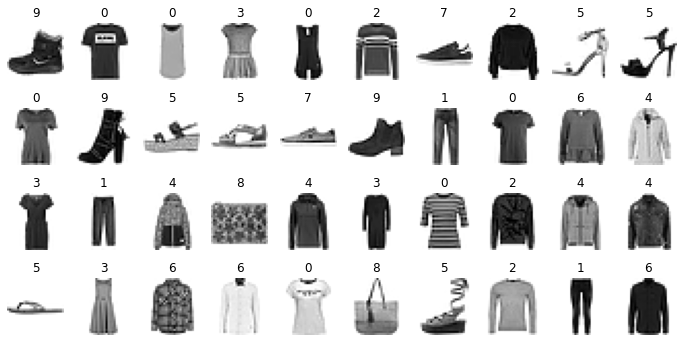

In [4]:
fig = plt.figure(figsize=(12, 6))
for i, im in enumerate(x_train[:40]):
    a = fig.add_subplot(4, 10, i + 1)
    plt.axis('off')
    plt.imshow(im, cmap='gray_r')
    plt.title(y_train[i])
plt.show()

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
m, r, c = x_train.shape
x_train = x_train.reshape((m, r*c))
m, r, c = x_test.shape
x_test = x_test.reshape((m, r*c))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Supervised model
For compare reasons, we use only 50 random samples

In [7]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train[:50], y_train[:50], epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 8ms/step - loss: 2.3866 - accuracy: 0.1200
Epoch 2/10
2/2 [==============================] - 0s 17ms/step - loss: 2.2375 - accuracy: 0.1200
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 2.0749 - accuracy: 0.2800
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 2.0056 - accuracy: 0.2600
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 2.0658 - accuracy: 0.2800
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 1.8674 - accuracy: 0.3000
Epoch 7/10
2/2 [==============================] - 0s 9ms/step - loss: 1.8315 - accuracy: 0.4200
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 1.7518 - accuracy: 0.3800
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 1.5195 - accuracy: 0.5200
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 1.5960 - accuracy: 0.4400


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6949 - accuracy: 0.4431


[1.6949408054351807, 0.4431000053882599]

## Semi supervised approach

In [10]:
from sklearn.cluster import KMeans

First we make clusterize the training data (without the labels) into 50 groups, usually more groups than original classes

In [11]:
k = 50
kmeans = KMeans(n_clusters=k)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

We manually label the medoids of this K clusters

In [12]:
y_rd = y_train[representative_digit_idx]

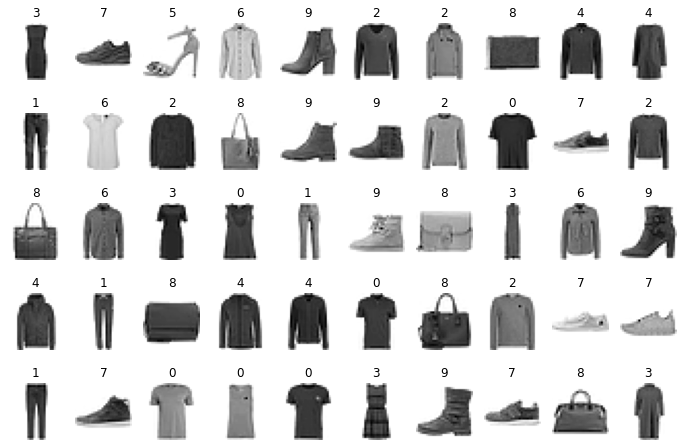

In [13]:
fig = plt.figure(figsize=(12, 8))
for i, im in enumerate(x_representative_digits):
    a = fig.add_subplot(5, 10, i + 1)
    plt.axis('off')
    plt.imshow(im.reshape((28, 28)), cmap='gray_r')
    plt.title(y_rd[i])
plt.show()

And use these medoids as the training data for a new model

In [14]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_representative_digits, y_rd, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 11ms/step - loss: 2.4165 - accuracy: 0.0600
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 2.1567 - accuracy: 0.2400
Epoch 3/10
2/2 [==============================] - 0s 19ms/step - loss: 1.9826 - accuracy: 0.3200
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 1.9293 - accuracy: 0.3200
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8662 - accuracy: 0.3000
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 1.7121 - accuracy: 0.4200
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 1.6770 - accuracy: 0.4400
Epoch 8/10
2/2 [==============================] - 0s 14ms/step - loss: 1.5362 - accuracy: 0.6000
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 1.4888 - accuracy: 0.5800
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 1.3687 - accuracy: 0.6200


Evaluation with thise medoids looks better than 50 random samples

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6133 - accuracy: 0.5755


[1.6132795810699463, 0.5755000114440918]

In [17]:
y_propag = np.empty(len(x_train), dtype=int)
for i in range(k):
    y_propag[kmeans.labels_ == i] = y_rd[i]

In [19]:
count = np.zeros((10), dtype=int)
for x in y_train:
    count[x] += 1

print(count)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


Our clustering algorithm didn't do a very good job unfortunately, but better than nothing

In [18]:
count = np.zeros((10), dtype=int)
for x in y_propag:
    count[x] += 1

print(count)

[7711 5317 6052 4686 6065 1184 6725 9862 5356 7042]


In [20]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_propag, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4737 - accuracy: 0.8160
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3288 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2878 - accuracy: 0.8844
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2645 - accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2495 - accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2403 - accuracy: 0.9043
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2307 - accuracy: 0.9074
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2197 - accuracy: 0.9126
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2127 - accuracy: 0.9147
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 3.6264 

[3.6263949871063232, 0.623199999332428]